**РЕКОМЕНДАЦИИ К ЗАДАНИЮ**

Для решения итоговых заданий по визуализации вы можете сами выбирать, какую библиотеку использовать. Если у вас возникнут трудности при решении задач, рекомендуем обратиться к документации по библиотекам Matplotlib, Seaborn и Plotly, где собраны сотни различных примеров построения графиков — вы точно найдёте то, что вам нужно. Также предлагаем вам обратиться к специальной литературе по визуализации:

        Шпаргалка по визуализации данных в Plotly на Хабре <https://habr.com/ru/post/502958/>
        
        Статья от SkillFactory по продвинутой визуализации данных с Plotly на Хабре <https://habr.com/ru/company/skillfactory/blog/510320/>
        
        Книга по визуализации данных в Matplotlib и Seaborn <https://lms.skillfactory.ru/assets/courseware/v1/0c0f3b18e05199ecf34adbbde93bb473/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/Python_Vizualizatsia_dannykh_Matplotlib_Seaborn_Mayavi_2020.pdf>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly
import plotly.express as px

**ЗАКРЕПЛЕНИЕ ЗНАНИЙ**

**Представлены данные об оттоке клиентов некоторого банка.**

In [2]:
churn_data=pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#посмотрим информацию о таблице
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Столбцы таблицы:** (14 столбцов, количество строк 10000)

    RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
    CustomerId — идентификатор клиента
    Surname — фамилия клиента
    CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
    Geography — страна клиента (банк международный)
    Gender — пол клиента
    Age — возраст клиента

    Tenure — сколько лет клиент пользуется услугами банка
    Balance — баланс на счетах клиента в банке
    NumOfProducts — количество услуг банка, которые приобрёл клиент
    HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
    IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
    EstimatedSalary — предполагаемая заработная плата клиента
    Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)



In [4]:
#удалим, как рекомендовано выше
churn_data.pop('RowNumber')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**ЗАДАНИЕ:**

**Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.**

**После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.** 



В файле должно содержаться 10 графиков — 10 ответов к заданиям.    
Каждый график и преобразования к нему выполняются в отдельной ячейке.
Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.






# Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.



Попробую несколько графиков в разных библиотеках для интереса

In [5]:
# Сгруппируе и подсчитаем, потом построим графики
Exited = churn_data.groupby('Exited')['CustomerId'].count()
Exited1 = Exited*100/10000  # эта табличка для графика в Pandas, т.к.сам % не считает
Exited.index = Exited1.index = ['лояльные', 'ушедшие']

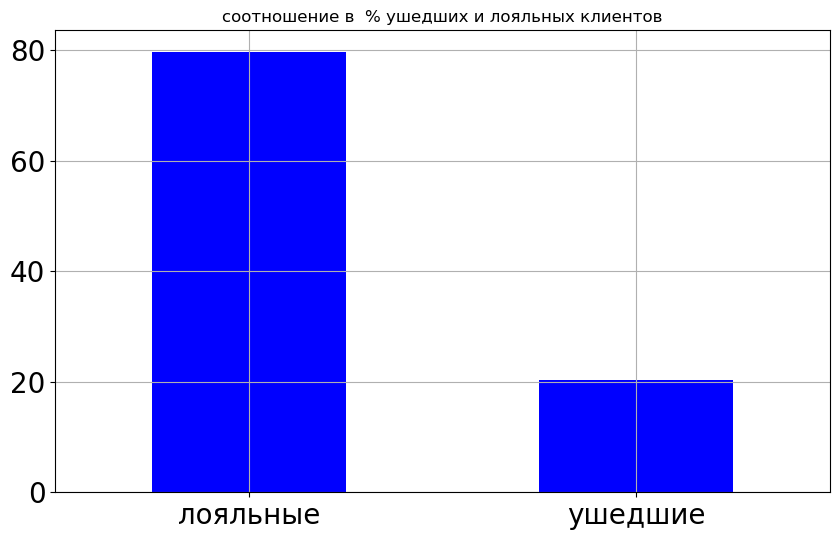

In [27]:
Exited1.plot(kind='bar',
             figsize=(10, 6),
             color='blue',
             grid=True,
             title='соотношение в  % ушедших и лояльных клиентов',
             rot=0
             );

Text(0.5, 1.0, 'соотношение в  % ушедших и лояльных клиентов')

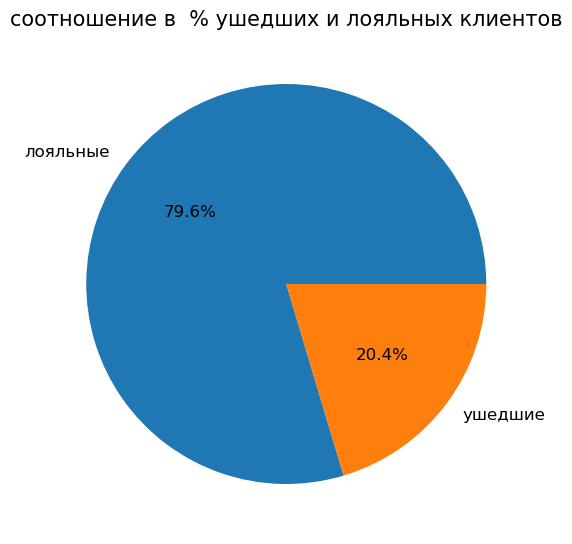

In [28]:
# построим круговую диаграмму в Matplotlib
fig = plt.figure(figsize=(5, 7))
axes = fig.add_axes([0, 0, 1, 1])

exit = axes.pie(Exited,
                labels=Exited.index,
                textprops={'fontsize': 12},
                autopct='%.1f%%'
                )
axes.set_title('соотношение в  % ушедших и лояльных клиентов',
               loc='center', fontsize=15)

In [29]:
# и ещё круговая диаграмма в Plotly express
fig = px.pie(Exited,
             names=Exited.index,
             values=Exited.values,
             height=500,
             width=700,
             title='соотношение в  % ушедших и лояльных клиентов'
             )
fig.update_traces(textfont_size=20)
fig.show()

## ВЫВОД 1: 
**Банк покинула пятая часть клиентов 20.4%, достаточно много.**



# Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Распределение удобнее показать с помощью гистограммы, также рекомендуется "ящик с усами" 

In [30]:
# выделяем этих "богачей"
big_balance = churn_data[churn_data['Balance']> 2500]

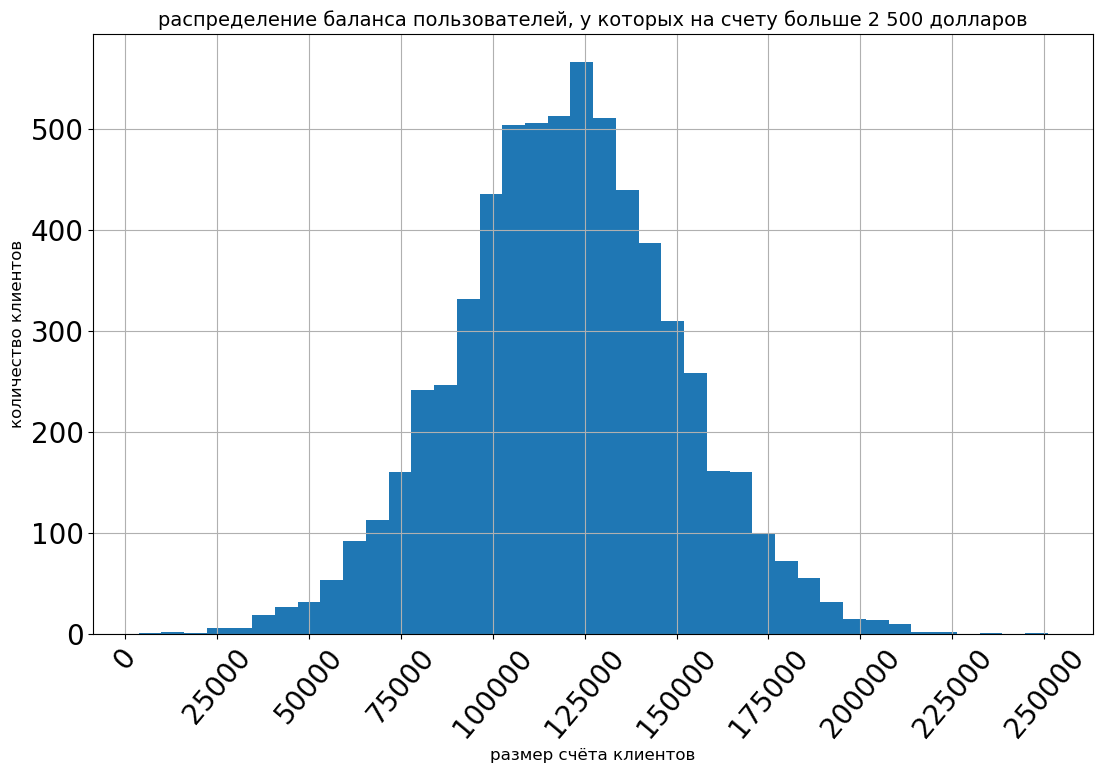

In [31]:
# сделаеи пару графиков
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=big_balance['Balance'],
          bins=40)
axes.set_title(
    'распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=14)
axes.set_xlabel('размер счёта клиентов', fontsize=12)

axes.set_ylabel('количество клиентов', fontsize=12)

axes.grid()
axes.set_xticks(range(0, 250001, 25000))
axes.xaxis.set_tick_params(rotation=50)

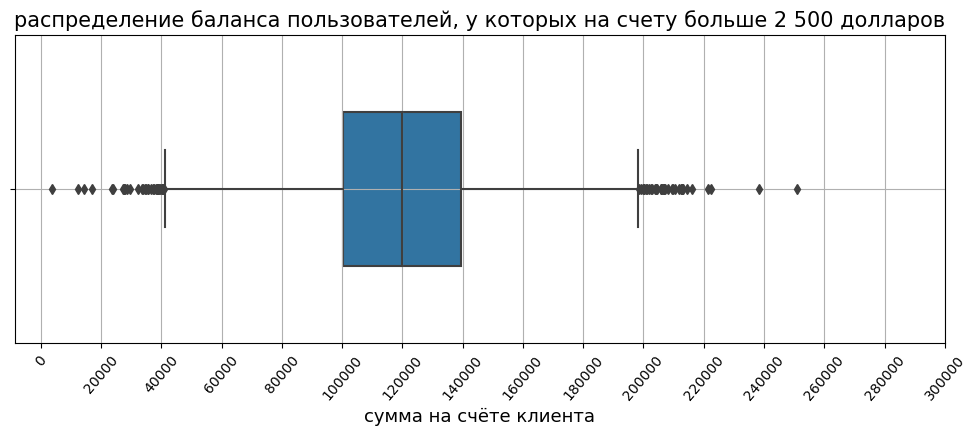

In [11]:
fig = plt.figure(figsize=(12, 4))
box = sns.boxplot(data=big_balance,
                  x='Balance',
                  orient='h',
                  width=0.5
                  )
box.set_title(
    'распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=15)
box.set_xlabel('сумма на счёте клиента', fontsize=13)
box.grid()
box.set_xticks(range(0, 300001, 20000))
box.xaxis.set_tick_params(rotation=50)

## ВЫВОД 2: 
**В основном у клиентов  (с балансом > 2500 дол. на счетах) сбережения составляют от 41 до 195 тыс.дол., 50 %  таких клиентов имеют на счетах от 100 до 140 тыс. дол., наибольшее количество в этой  группе- около 550 клиентов имеют на счету  120 тыс.дол. - медианное значение. За границами "усов"  имеются выбросы - балансы - нижние до 5 тыс.дол. и верхние до 250 тыс.дол. Значения относительно медианы распределены симметричо.**

# Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

из рекомендаций по выбору типа визуализации распределение числового признака в разрезе лучше демонстировать с помощью коробчатой диаграммы 

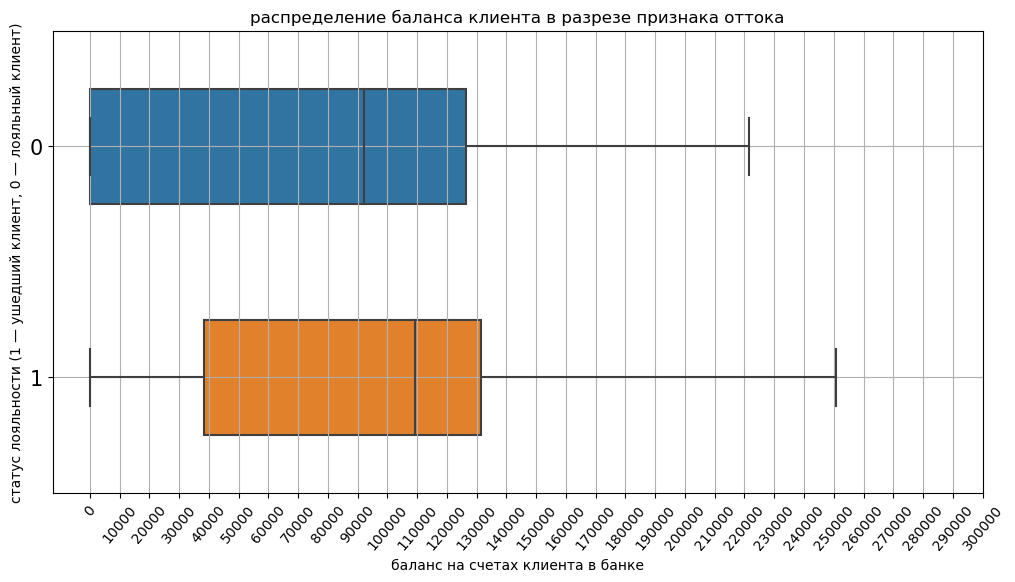

In [12]:
fig = plt.figure(figsize=(12, 6))
box = sns.boxplot(data=churn_data,
                  x='Balance',
                  y='Exited',
                  orient='h',
                  width=0.5
                  )
box.set_title('распределение баланса клиента в разрезе признака оттока')
box.set_xlabel('баланс на счетах клиента в банке')
box.set_ylabel('статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)')
box.set_xticks(range(0, 300001, 10000))
box.xaxis.set_tick_params(rotation=50)
box.set_xticklabels(box.get_xticks(), size=10)
box.set_yticklabels(box.get_yticks(), size=15)
box.grid()

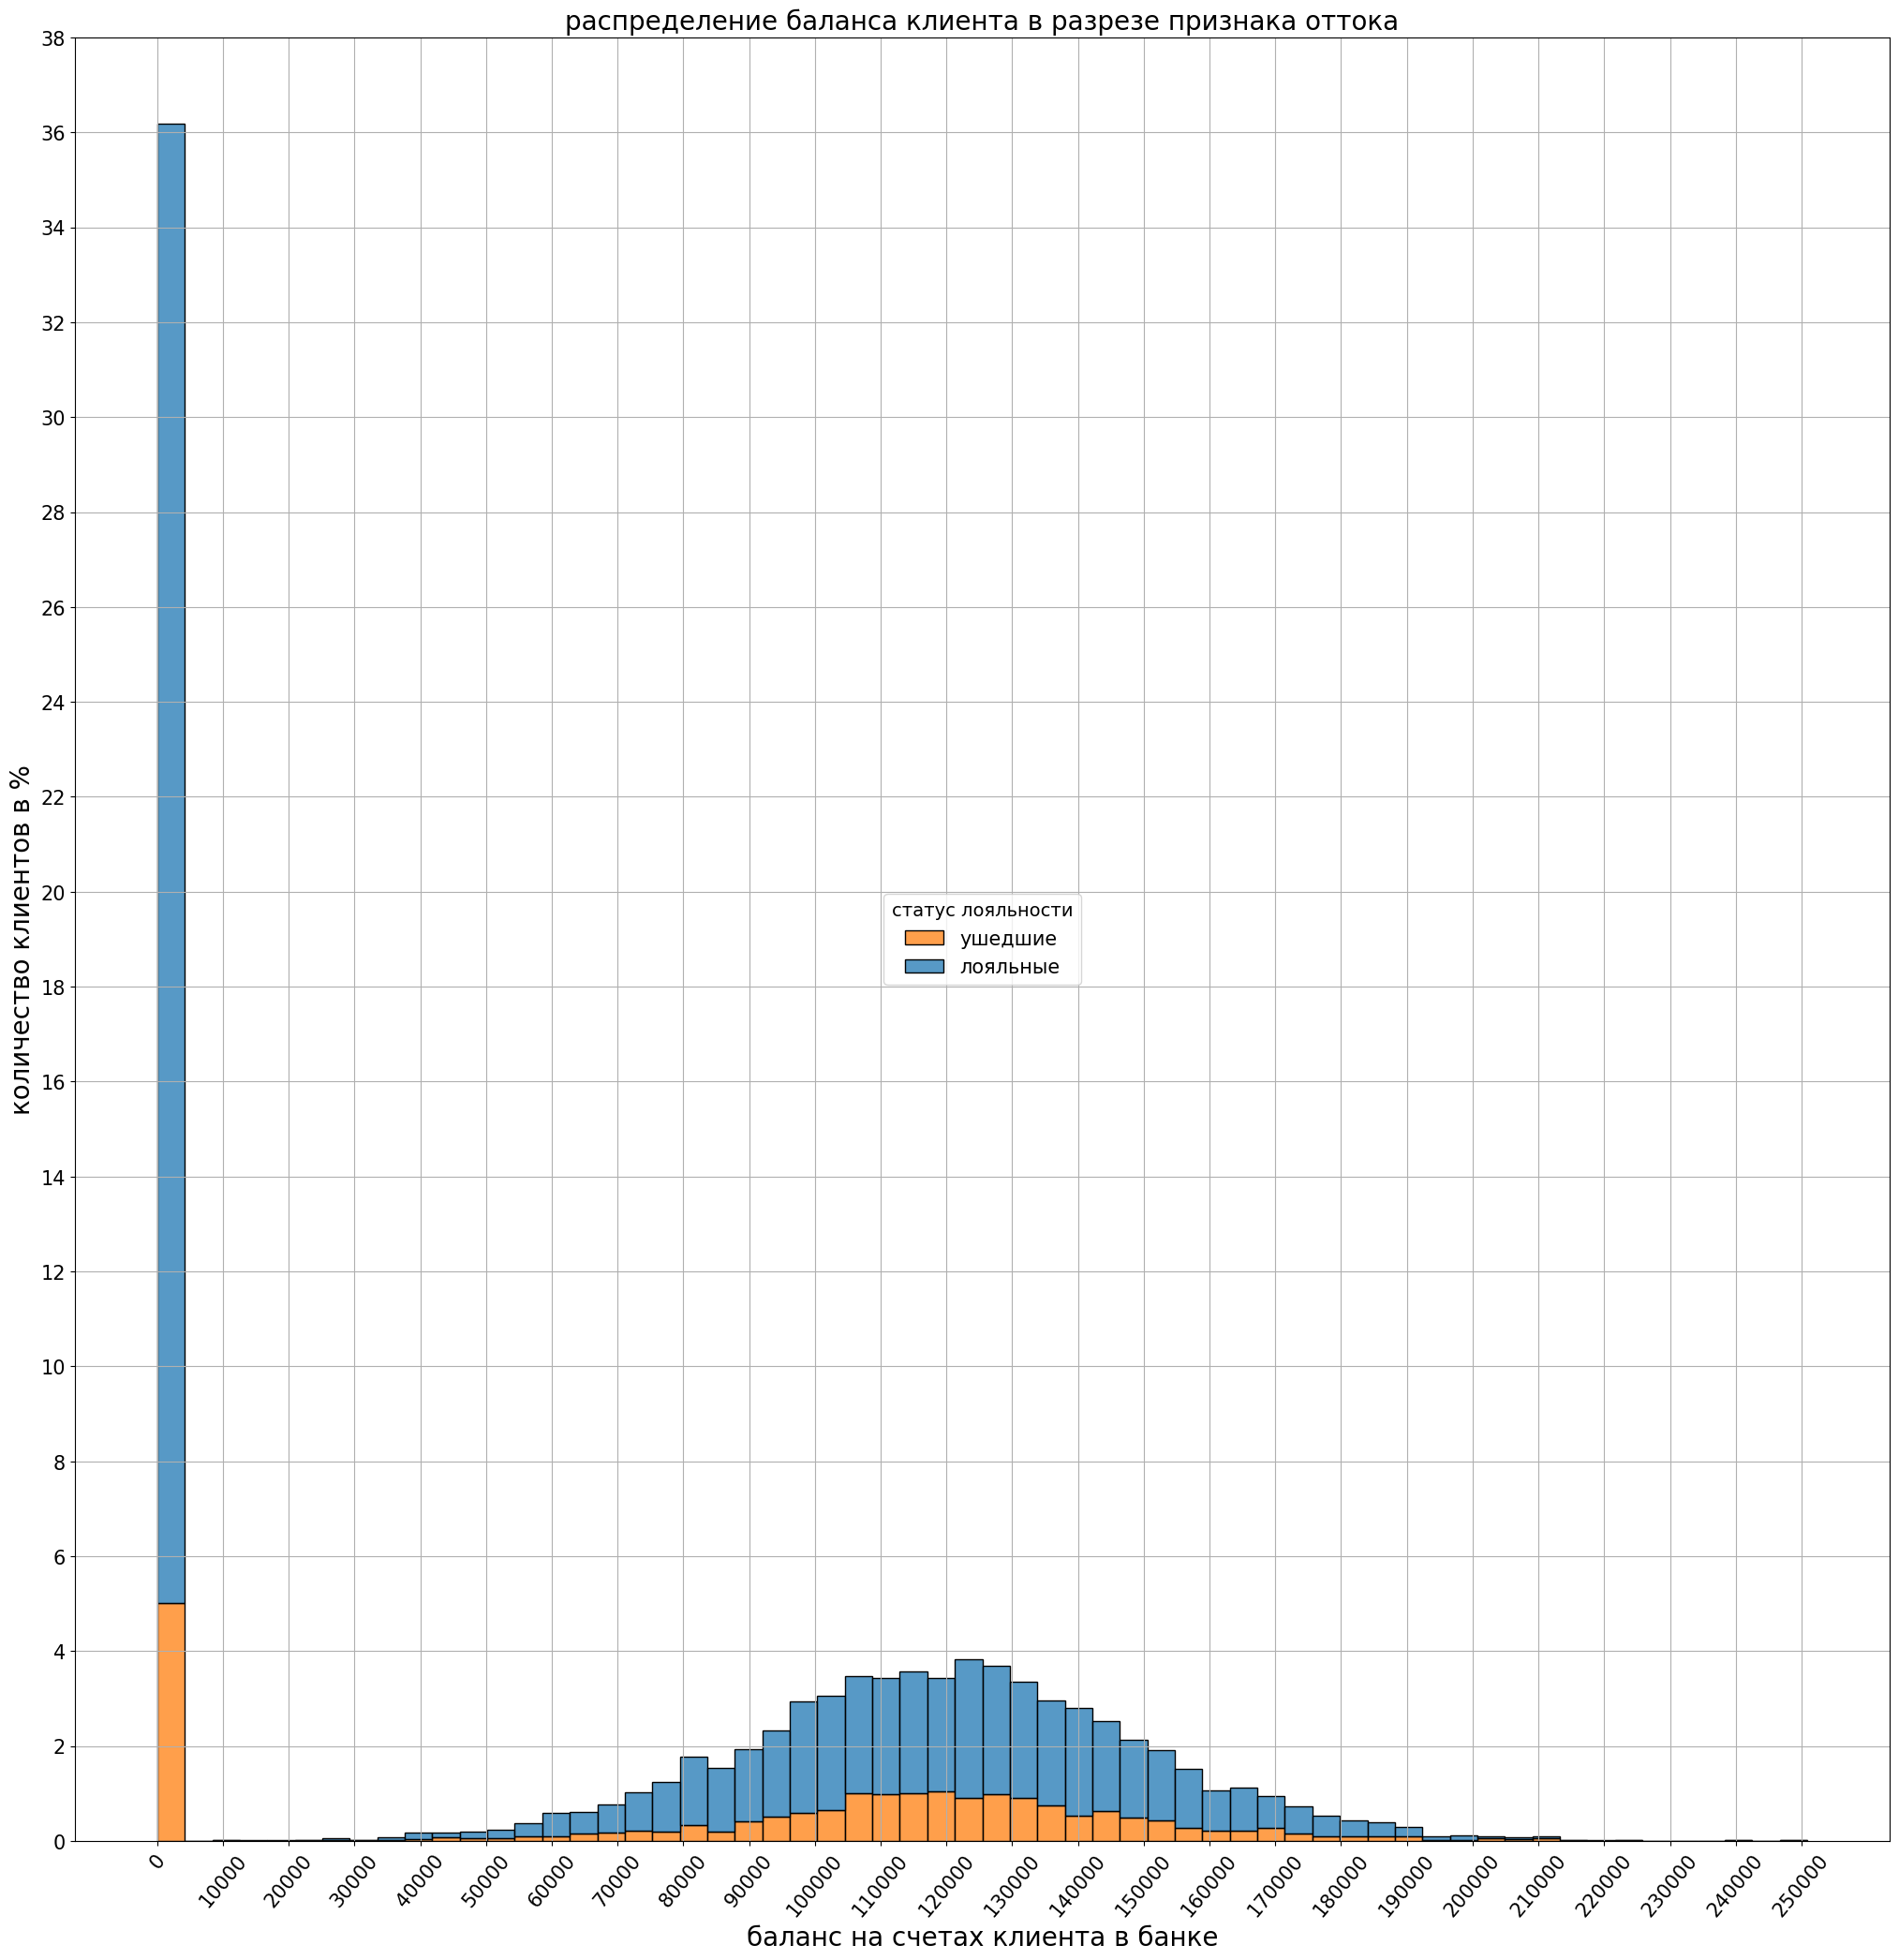

In [32]:
# также попробую гистограмму Seaborn
fig = plt.figure(figsize=(25, 25))
hist = sns.histplot(data=churn_data,
                    x='Balance',
                    hue='Exited',
                    stat='percent',
                    bins=60,
                    multiple="stack"
                    )
hist.legend(title='статус лояльности', labels=[
            'ушедшие', 'лояльные'], fontsize=15, title_fontsize=14, loc='center')
hist.set_xticks(range(0, 250001, 10000))
hist.set_yticks(range(0, 40, 2))
hist.xaxis.set_tick_params(rotation=50)
hist.set_xticklabels(hist.get_xticks(), size=15)
hist.set_yticklabels(hist.get_yticks(), size=15)

hist.set_title(
    'распределение баланса клиента в разрезе признака оттока', size=20)
hist.set_xlabel('баланс на счетах клиента в банке', size=20)
hist.set_ylabel('количество клиентов в %', size=20)

hist.grid()

### ВЫВОД 3:
**График с boxplot покаывает что счета с нулевым балансом есть в обеих группах клиентов,  границы баланса :**

**лояльных 0-221 тыс.дол., медиана 91 тыс.дол. (0-91 тыс.дол - 50% всех клиентов, 91-128 тыс.дол.-25%,128-221 тыс.дол - 25%),**

**ушедших 0-250 тыс.дол., медиана 110 тыс.дол. (0-38 тыс.дол - 25%, 38-110 тыс.дол.-25%,110-131 тыс.дол - 25%, 131-250 тыс.дол - 25%).**

**Т.о. ушла четвертая часть клиентов, со значительными балансами на счетах. Возможно политика банка перестала устраивать более состоятельных, активно зарабатывающих клиентов.**  


**Из графика histplot можно добавить что в данном банке самой многочисленная частью клиентов - 36% среди лояльных и 5% среди ушедших являются те, которые имеют на счетах суммы от 0 до 5 тыс.дол.**

# Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

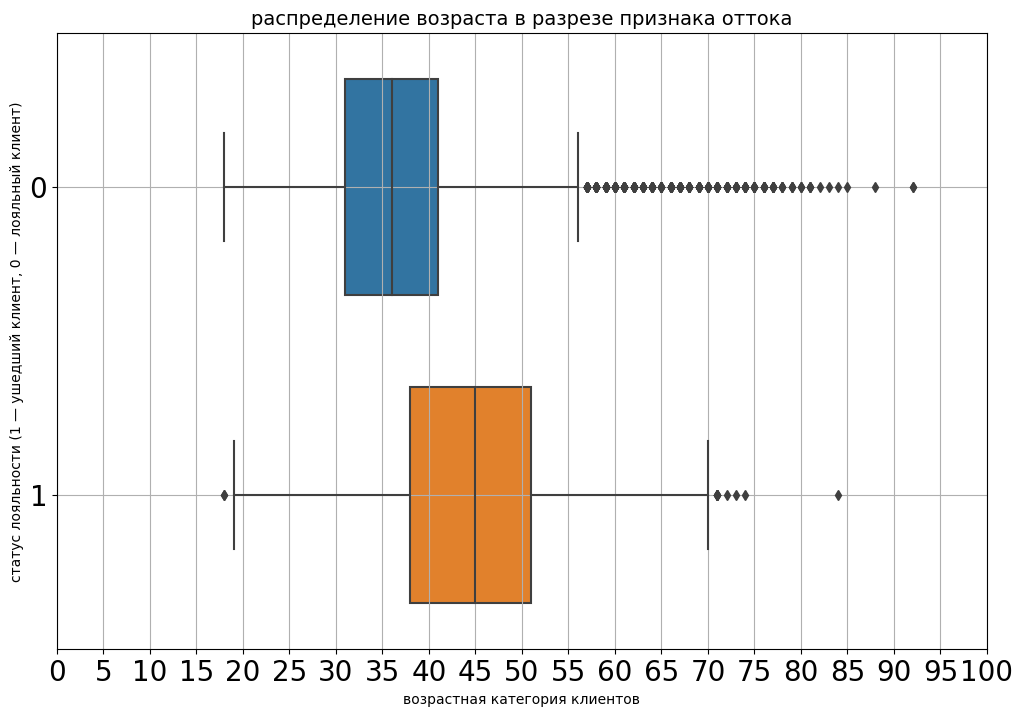

In [33]:
fig = plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=churn_data,
                      x='Age',
                      y='Exited',
                      orient='h',
                      width=0.7
                      )
boxplot.set_title(
    'распределение возраста в разрезе признака оттока', fontsize=14)
boxplot.set_xlabel('возрастная категория клиентов')
boxplot.set_ylabel(
    'статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)')
boxplot.set_xticks(range(0, 101, 5))
boxplot.grid()

## ВЫВОД 4:
**Возраст лояльных клиентов 18-56 лет, 50% этой группы - 31-41 год, медианное значение возраста 36 лет. За верхней границей очень много выбросов - до 93 лет.**

**Границы возрастного диапазана ушедших клиентов  - 18-70 лет, есть единичные выбросы за границами. 50% ушедших клиентов  в  возрасте- 38-51 год, 45 лет-медианное значение возраста.**

***Следовательно банку стоит обращать внимание на возрастную группу клиентов  от 38 лет до 51 года. (С балансами на счетах от 40 до  130 тыс.дол.)***

# Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Взаимосвязь двух признаков в разрезе покажем с помощью диаграммы рассеяния, с групировкой (в цвете) по признаку оттока

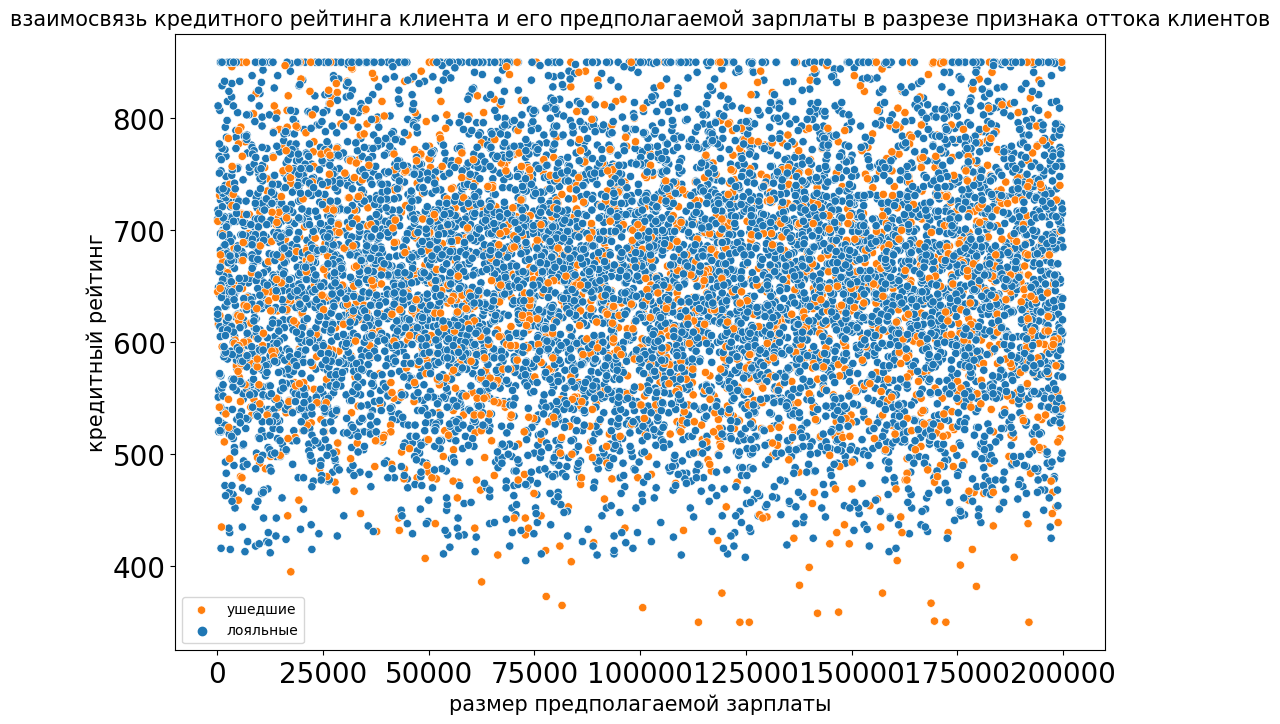

In [35]:
fig = plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=churn_data,
                          x='EstimatedSalary',
                          y='CreditScore',
                          hue='Exited'
                          )
scatter.set_title('взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты в разрезе признака оттока клиентов',
                  fontsize=15)
scatter.set_xlabel('размер предполагаемой зарплаты', fontsize=15)
scatter.set_ylabel('кредитный рейтинг', fontsize=15)
scatter.legend(labels=['ушедшие', 'лояльные']);

## ВЫВОД 5: 
**Можно сказать что плотность распределения точек всех цветов на графике равномерная. Есть единичные случаи локализации ушедших клиентов в зоне низкого рейтинга. Т.о. распределение кредитного рейтинга относительно предполагаемой зарплаты носит равномерный характер, зависимости не прослеживается ни у лояльных, ни у ушедших клиентов банка.** 

# Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это. 
Подсказка: Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [36]:
G1 = churn_data.groupby('Gender')['Exited'].mean()  # это "подсказка"
fig = px.pie(G1,
             names=G1.index,
             values=G1.values,
             title='соотношение в  % ушедших мужчин и женщин',
             )
fig.show()

In [17]:
# для справки
churn_data.groupby('Gender')['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

## ВЫВОД 6: 
**Чаще (почти вдвое) уходят женщины. Численное превосходство отбрасывается, возможно влияет импульсивность, либо наоборот- большая ответственность, требовательность.**

#  Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

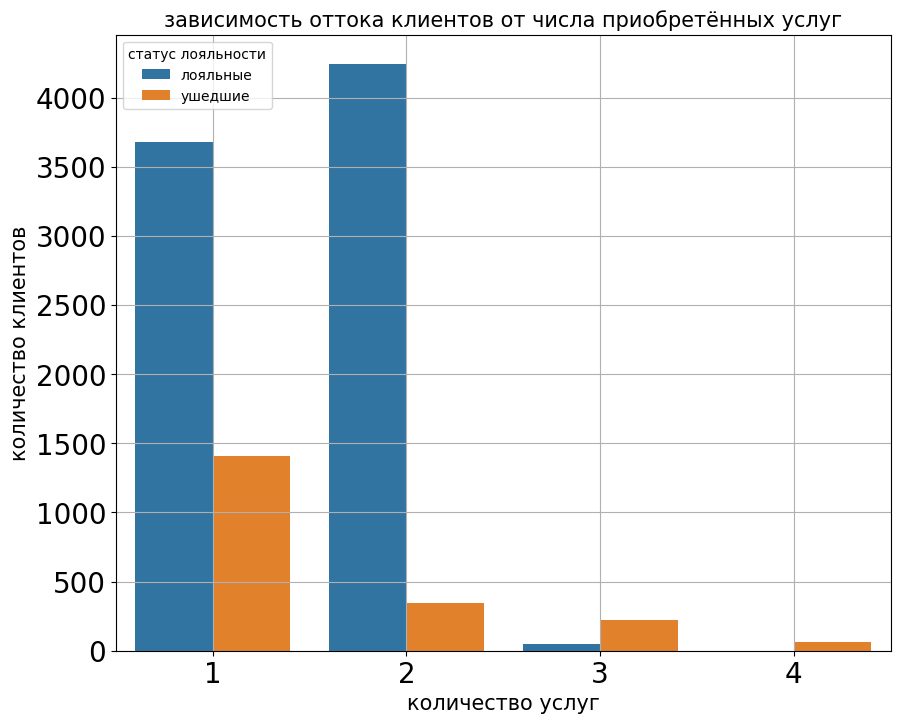

In [38]:
fig = plt.figure(figsize=(10, 8))
products = sns.countplot(x='NumOfProducts',
                         hue='Exited',
                         data=churn_data
                         )
products.grid()
products.set_title(
    'зависимость оттока клиентов от числа приобретённых услуг', fontsize=15)
products.set_xlabel('количество услуг', fontsize=15)
products.set_ylabel('количество клиентов', fontsize=15)
products.legend(title='статус лояльности', labels=['лояльные', 'ушедшие']);

## ВЫВОД 7:
**Ушедшие клиенты приобретали весь ассортимент услуг банка (все 4), максимальное количество - около 1400 клиентов приобрело 1 услугу, далее количество клиентов продолжающих пользоватьмя 2-мя и более услугами банка значительно уменьшается -  в 3 и более раз.** 

**Лояльные  клиенты  приобретали 3 услуги банка, большая часть клиентов пользуется 1 и 2 услугами, количество пользующихся 3 услугам незначительное (можно даже не рассматривать). Клиентов, пользующихся 2 услугами больше чем клиентов с 1 услугой.**

***Из этого можно сделать вывод об имеющихся недостатках в предоставляемых услугах и их качестве***

# Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

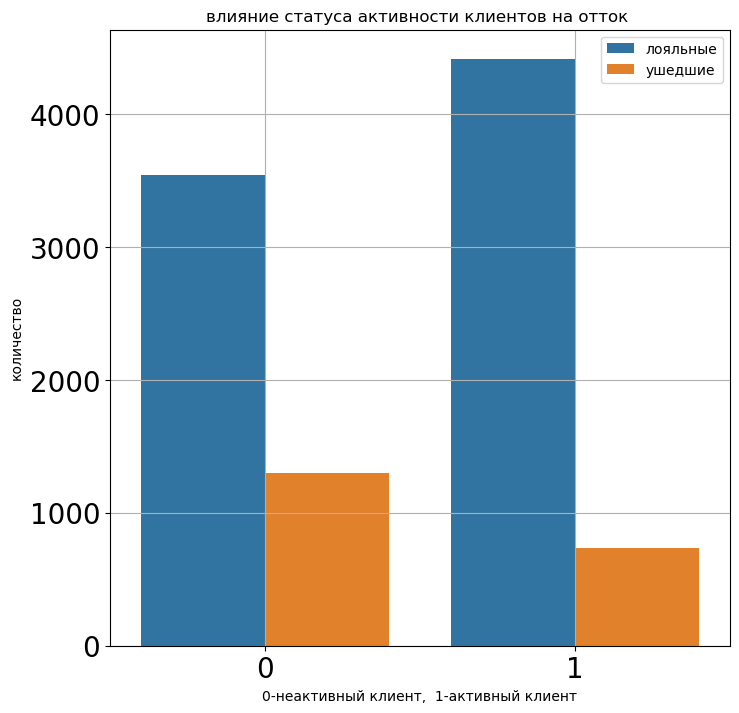

In [39]:
# IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
# если с клиентом заключена сделка в течение последних 30 дней — он активный;
# если с даты заключения последней сделки прошло более 30 дней — клиент становится неактивным;
fig = plt.figure(figsize=(8, 8))
active = sns.countplot(x='IsActiveMember',
                       hue='Exited',
                       data=churn_data,
                       )
active.set_title('влияние статуса активности клиентов на отток ')
active.set_xlabel('0-неактивный клиент,  1-активный клиент')
active.set_ylabel('количество')
active.grid()
active.legend(labels=['лояльные', 'ушедшие'])

## ВЫВОД 8: 
**Среди ушедших неактивных клиентов в 2 раза больше активных. Ранее мы выяснили что ушедшие клиенты приобретали весь спектр услуг, но после первой услуги их желание приобретать 2 и более услуг банка резко снижалась. Возможно, именно условия предоставления, либо качество их оказания оставили желать лучшего, клиенты перешли в стаус неактивных, а далее и вовсе отказались от услуг банка.**

# В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [40]:
data1 = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
fig = px.choropleth(data_frame=data1,
                    color='Exited',
                    locations='Geography',
                    locationmode='country names',
                    range_color=[0, 1],
                    color_continuous_scale='Reds',
                    width=800,
                    height=500)
fig.show()

In [41]:
# к выводам
display(churn_data.groupby('Geography', as_index=False)['CustomerId'].count())

,Geography,CustomerId
0,France,5014
1,Germany,2509
2,Spain,2477


## ВЫВОД 9: 
**Наибольшая доля ушедших из Германии, хотя по численности клиенты из Германии не на первом месте. Поскольку мне сложно судить об экономической ситуации в этих странах относительно друг друга, то выдвину следующую версию.** 

**Наибольший отток клиентов в Германии связан с большей деловой активностью,требовательностью, прагматичностью жителей Германии, как таковых.**

**Отток клиентов из Испании и Франции меньше в 2 раза. Разные источники говорят о сходстве жителей этих стран в отсутствии пунктуальности, не слишком большой любви к работе, ими отдаётся предпочтение отдыху, радостям жизни, семье.** 

***Следовательно для повседневной жизни условия пользования данным банком вполне удовлетворительные. Тогда как для предпринимателей, ведения бизнеса данный банк не предоставляет привлекательных условийй***

**ПРЕОБРАЗОВАНИЕ: Переведите числовой признак *CreditScore* в категориальный. Для этого воспользуйтесь функцией *get_credit_score_cat()*, которая приведена ниже. Примените её к столбцу *CreditScore* и создайте новый признак *CreditScoreCat* — категории кредитного рейтинга.**

In [22]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга *(CreditScoreCat)*, а столбцами — количество лет, в течение которых клиент пользуется услугами банка *(Tenure)*. В ячейках сводной таблицы должно находиться среднее по признаку оттока *(Exited)* — доля ушедших пользователей.**

**На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**


In [42]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(
    get_credit_score_cat)

In [43]:
churn_pivot = churn_data.pivot_table(values='Exited',
                                     index='CreditScoreCat',
                                     columns='Tenure'
                                     )
display(churn_pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


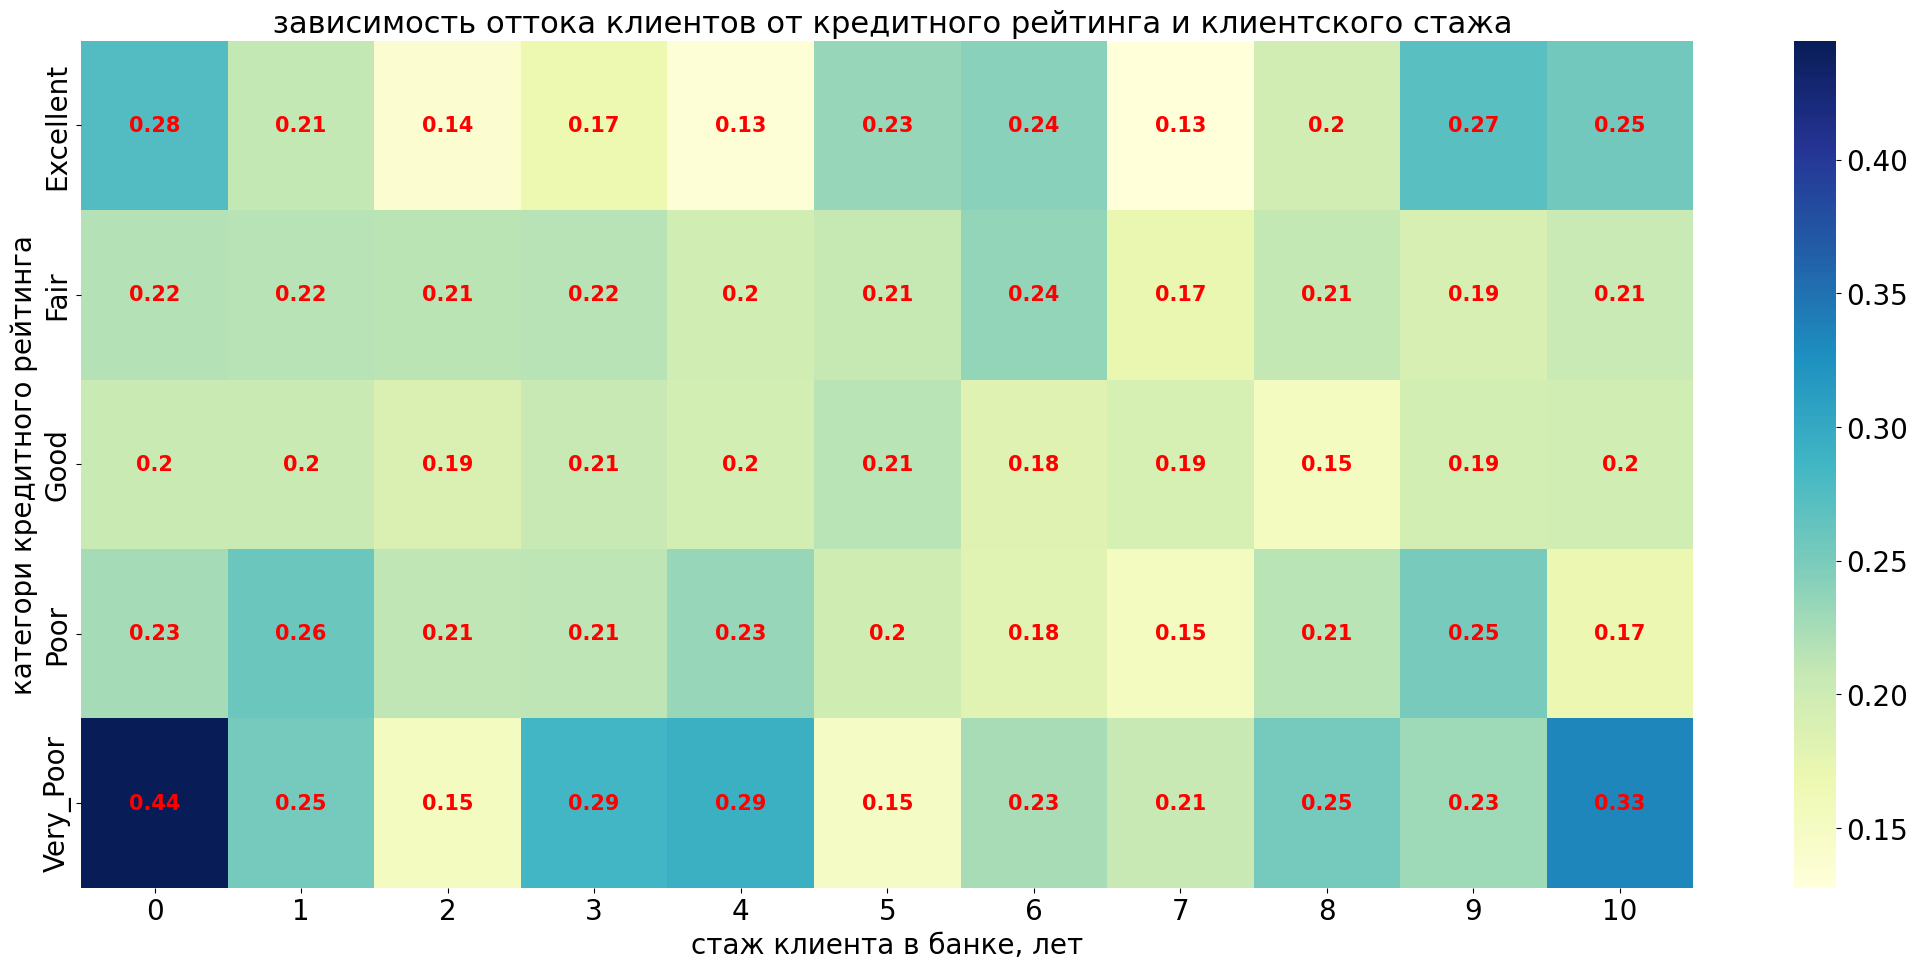

In [44]:
fig = plt.figure(figsize=(26, 11))

heatmap = sns.heatmap(data=churn_pivot, cmap="YlGnBu", annot=True, annot_kws={
                      'size': 15, 'weight': 'bold', 'color': 'red'})
heatmap.set_title(
    ' зависимость оттока клиентов от кредитного рейтинга и клиентского стажа', size=22)
heatmap.set_xlabel('стаж клиента в банке, лет', size=20)
heatmap.set_ylabel('категори кредитного рейтинга', size=20)
sns.set_context(rc={'xtick.labelsize': 20.0, 'ytick.labelsize': 20.0})

## ВЫВОД 10: 
**Чаще банк покидают клиенты:**

**с низким и очень кредитным рейтингом со стажем до 2-х лет, 3,4, и 10 лет**, 


**с превосходным кредитным рейтингом со стажем до 1 года, и 5,6 и более 9 лет**.

***Особенно часто уходят клиенты с низкими рейтингами.Возможно низкий кредитный рейтинг влияет на условия и качество предоставляемых услуг. Уход новых клиентов и с низким и с высоким рейтингом можно объяснить завышенными ожидания от обслуживания в банке, что не соответствовало действительности. Клиенты с многолетним стажем не ощутили каких-либо вознаграждениий, поощренийй за сотрудничество и также покинули банк.*** 




# ИТОГИ: КАКИЕ КЛИЕНТЫ ПОКИНУЛИ БАНК:

**Четвёртая часть клиентов со значительными балансами на счетах(38-131 тыс.дол), возраст 38-51 год, большинство из них - женщины. Большая часть ушедшх клиентов из Германии. Также в основном приобретали 1 услугу, имели неактивный статус. Пользовались банком первый год или 9 и более лет с очень низким и самым высоким кредитным рейтингом,  также на 3-4 год при низком кредитном рейтинге.**

**Это может указывать на недостатки клиентского сервиса, качество, условия предоставления продуктов и услуг банка, отсутствии поощрений за долговременное сотрудничество, ориентированность на привлечение ("заманивание") новых клиентов, отсутствием достаточного внимания к запросам уже имеющихся клиентов**



